# Create dataset from OpenStreetMap data and Mapbox tiles

## Dependencies

In [ ]:
%pip install --quiet git+https://github.com/mozilla-ai/osm-ai-helper.git
%pip install --quiet ultralytics

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Download data from OpenStreetMap

In [ ]:
from osm_ai_helper.download_osm import download_osm

- `TRAIN_AREA` / `VAL_AREA`

Pick values that don't geographically overlap.

Can be city, state, country, etc.

Uses the [Nominatim API](https://nominatim.org/release-docs/develop/api/Search/).

- `SELECTOR`

OpenStreetMap tag to select elements.
Check some examples of [OpenStreetMap tags](https://wiki.openstreetmap.org/wiki/Map_features).

Uses the [Overpass API](https://wiki.openstreetmap.org/wiki/Overpass_API/Language_Guide).

The example uses ["leisure=swimming_pool"](https://wiki.openstreetmap.org/wiki/Tag:leisure%3Dswimming_pool)

- `DISCARD`

Elements matching any of the given key/value pairs will be discarded.

The chosen `SELECTOR` might pull elements that are not revelant for training, so
you can use this to filter unwanted elements.

The example uses `{"location": "indoor"}` to filter swimming pools that are not
visible in the satellite image.


In [ ]:
TRAIN_AREA = "Galicia"
VAL_AREA = "Asturias"
SELECTOR = "leisure=swimming_pool"
DISCARD = {"location": "indoor"}
CLASS_NAME = "swimming_pool"

In [ ]:
download_osm(
    area=TRAIN_AREA,
    output_dir="datasets",
    selector=SELECTOR,
    discard=DISCARD,
)

2025-02-12 14:09:55.555 | INFO     | osm_ai_helper.download_osm:download_osm:39 - Downloading osm data for Galicia
2025-02-12 14:09:59.970 | INFO     | osm_ai_helper.download_osm:download_osm:47 - Writing 7591 elements to datasets/Galicia.json
2025-02-12 14:10:00.263 | SUCCESS  | osm_ai_helper.download_osm:download_osm:49 - Done!


In [ ]:
download_osm(
    area=VAL_AREA,
    output_dir="datasets",
    selector=SELECTOR,
    discard=DISCARD,
)

2025-02-12 14:10:00.295 | INFO     | osm_ai_helper.download_osm:download_osm:39 - Downloading osm data for Asturias
2025-02-12 14:10:06.003 | INFO     | osm_ai_helper.download_osm:download_osm:47 - Writing 2602 elements to datasets/Asturias.json
2025-02-12 14:10:06.059 | SUCCESS  | osm_ai_helper.download_osm:download_osm:49 - Done!


## Download tiles from Mapbox

In [ ]:
from google.colab import userdata

from osm_ai_helper.group_elements_and_download_tiles import (
    group_elements_and_download_tiles,
)

- `ZOOM`

An appropriate [`zoom` level](https://docs.mapbox.com/help/glossary/zoom-level/)

There is a tradeoff between easier detection (higher zoom levels) and covering a wider area on each tile (lower zoom levels).

The example uses `18` for swimming pools.

In [ ]:
ZOOM = 18

You need to set the `MAPBOX_TOKEN` Colab secret:

- Create an account: https://console.mapbox.com/
- Follow this guide to obtain your [Default Public Token](https://docs.mapbox.com/help/getting-started/access-tokens/#your-default-public-token).

In [ ]:
group_elements_and_download_tiles(
    f"datasets/{TRAIN_AREA}.json",
    f"datasets/{TRAIN_AREA}",
    userdata.get("MAPBOX_TOKEN"),
    zoom=ZOOM,
)

2025-02-12 14:10:09.869 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_elements_and_download_tiles:35 - Grouping elements by tile
2025-02-12 14:10:10.810 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_elements_and_download_tiles:40 - Downloading tiles and writing annotation
2025-02-12 14:10:10.812 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_elements_and_download_tiles:43 - Processed 0/6594 tiles
2025-02-12 14:10:13.065 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_elements_and_download_tiles:43 - Processed 50/6594 tiles
2025-02-12 14:10:15.182 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_elements_and_download_tiles:43 - Processed 100/6594 tiles
2025-02-12 14:10:17.309 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_elements_and_download_tiles:43 - Processed 150/6594 tiles
2025-02-12 14:10:19.375 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_e

In [ ]:
group_elements_and_download_tiles(
    f"datasets/{VAL_AREA}.json",
    f"datasets/{VAL_AREA}",
    userdata.get("MAPBOX_TOKEN"),
    zoom=ZOOM,
)

2025-02-12 15:02:06.108 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_elements_and_download_tiles:35 - Grouping elements by tile
2025-02-12 15:02:06.416 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_elements_and_download_tiles:40 - Downloading tiles and writing annotation
2025-02-12 15:02:06.417 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_elements_and_download_tiles:43 - Processed 0/2423 tiles
2025-02-12 15:02:29.683 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_elements_and_download_tiles:43 - Processed 50/2423 tiles
2025-02-12 15:02:53.430 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_elements_and_download_tiles:43 - Processed 100/2423 tiles
2025-02-12 15:03:18.470 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_elements_and_download_tiles:43 - Processed 150/2423 tiles
2025-02-12 15:03:44.900 | INFO     | osm_ai_helper.group_elements_and_download_tiles:group_e

## Convert to YOLO dataset

We are going to use the dataset to train a YOLO model from https://www.ultralytics.com/ so we need to convert the dataset to [the expected format](https://docs.ultralytics.com/datasets/detect/)

In [ ]:
from osm_ai_helper.convert_to_yolo_dataset import convert_to_yolo_dataset

In [ ]:
convert_to_yolo_dataset(f"datasets/{TRAIN_AREA}")

In [ ]:
convert_to_yolo_dataset(f"datasets/{VAL_AREA}")

# Check out of the box predictions

In [ ]:
from pathlib import Path
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
yolo = YOLO("yolo11m.pt")

100%|██████████| 38.8M/38.8M [00:00<00:00, 239MB/s]


In [ ]:
yolo.predict(list(Path(f"datasets/{VAL_AREA}").glob("*.jpg"))[0], save=True)

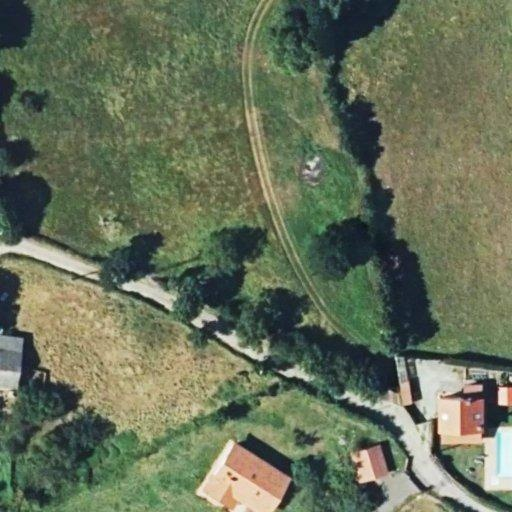

In [ ]:
from PIL import Image

Image.open(list(Path("runs/detect/predict").glob("*.jpg"))[0])

# Upload Dataset

The dataset will be uploaded to the [HuggingFace Hub Datasets](https://huggingface.co/docs/hub/datasets).

You need to set the `HF_TOKEN` Colab secret:

- Create an account: https://huggingface.co/join
- Follow this guide about [`User Access Tokens`](https://huggingface.co/docs/hub/security-tokens)



In [ ]:
!rm datasets/{TRAIN_AREA}/*.json

In [ ]:
!rm datasets/{VAL_AREA}/*.json

In [ ]:
!zip -r -q train.zip datasets/{TRAIN_AREA}

In [ ]:
!zip -r -q val.zip datasets/{VAL_AREA}

In [ ]:
USER = "mozilla-ai"
REPO = "osm-swimming-pools"

Create the yaml config used by YOLO

In [ ]:
Path("yolo_dataset.yaml").write_text(
    f"""
path: .
train: {TRAIN_AREA}
val: {VAL_AREA}

names:
  0: {CLASS_NAME}
"""
)

65

In [ ]:
from huggingface_hub import HfApi

In [ ]:
api = HfApi()

In [ ]:
api.create_repo(f"{USER}/{REPO}", token=userdata.get("HF_TOKEN"), repo_type="dataset")

RepoUrl('https://huggingface.co/datasets/daavoo/osm-swimming-pools', endpoint='https://huggingface.co', repo_type='dataset', repo_id='daavoo/osm-swimming-pools')

In [ ]:
api.upload_file(
    token=userdata.get("HF_TOKEN"),
    path_or_fileobj="train.zip",
    path_in_repo="train.zip",
    repo_id=f"{USER}/{REPO}",
    repo_type="dataset",
)

train.zip:   0%|          | 0.00/407M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/daavoo/osm-swimming-pools/commit/7de101c494df857f3d42401a883de75b8380ee36', commit_message='Upload train.zip with huggingface_hub', commit_description='', oid='7de101c494df857f3d42401a883de75b8380ee36', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/daavoo/osm-swimming-pools', endpoint='https://huggingface.co', repo_type='dataset', repo_id='daavoo/osm-swimming-pools'), pr_revision=None, pr_num=None)

In [ ]:
api.upload_file(
    token=userdata.get("HF_TOKEN"),
    path_or_fileobj="val.zip",
    path_in_repo="val.zip",
    repo_id=f"{USER}/{REPO}",
    repo_type="dataset",
)

val.zip:   0%|          | 0.00/128M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/daavoo/osm-swimming-pools/commit/eb6f82bca5f5de63aff49d0b32445b9c13424a95', commit_message='Upload val.zip with huggingface_hub', commit_description='', oid='eb6f82bca5f5de63aff49d0b32445b9c13424a95', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/daavoo/osm-swimming-pools', endpoint='https://huggingface.co', repo_type='dataset', repo_id='daavoo/osm-swimming-pools'), pr_revision=None, pr_num=None)

In [ ]:
api.upload_file(
    token=userdata.get("HF_TOKEN"),
    path_or_fileobj="yolo_dataset.yaml",
    path_in_repo="yolo_dataset.yaml",
    repo_id=f"{USER}/{REPO}",
    repo_type="dataset",
)

CommitInfo(commit_url='https://huggingface.co/datasets/daavoo/osm-swimming-pools/commit/20e6a383f90f6e4a106c5f45fdaee48f6b37cb4d', commit_message='Upload yolo_dataset.yaml with huggingface_hub', commit_description='', oid='20e6a383f90f6e4a106c5f45fdaee48f6b37cb4d', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/daavoo/osm-swimming-pools', endpoint='https://huggingface.co', repo_type='dataset', repo_id='daavoo/osm-swimming-pools'), pr_revision=None, pr_num=None)